# Convolutional Neural Networks

### CIFAR10 Dataset

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import keras
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout,BatchNormalization
from sklearn.metrics import confusion_matrix, accuracy_score

In [18]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context #needed this to download data

In [3]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

assert x_train.shape == (50000, 32, 32, 3)
assert x_test.shape == (10000, 32, 32, 3)
assert y_train.shape == (50000, 1)
assert y_test.shape == (10000, 1)

## The CIFAR-10 dataset consists of 60000 32x32 color images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.

### Our goal will be to create a model that will guess what is presented in the picture.

## In the data we have 10 classes:
    1. airplane
    2. automobile
    3. bird
    4. cat
    5. deer
    6. dog
    7. frog
    8. horse
    9. ship
    10. truck

In [4]:
labels = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

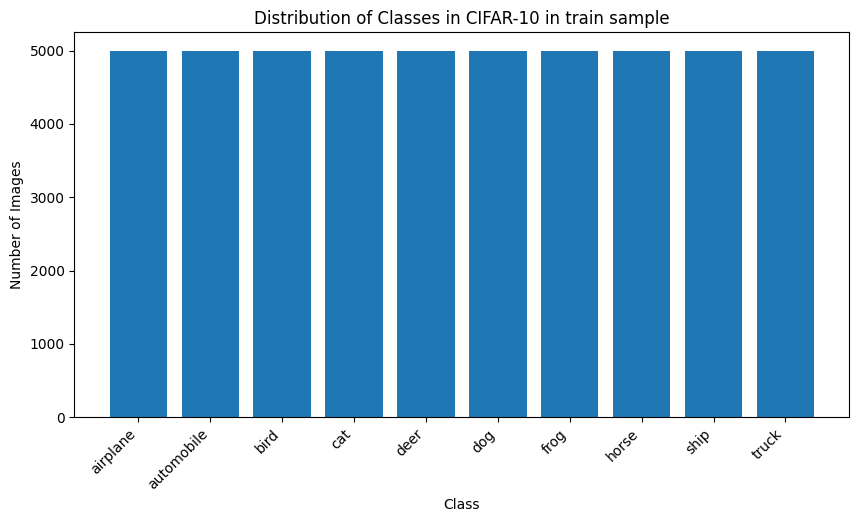

In [5]:
class_counts = np.bincount(y_train.flatten())

plt.figure(figsize=(10, 5))
plt.bar(range(len(class_counts)), class_counts, tick_label=labels)
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.title('Distribution of Classes in CIFAR-10 in train sample')
plt.xticks(rotation=45, ha='right')
plt.show()

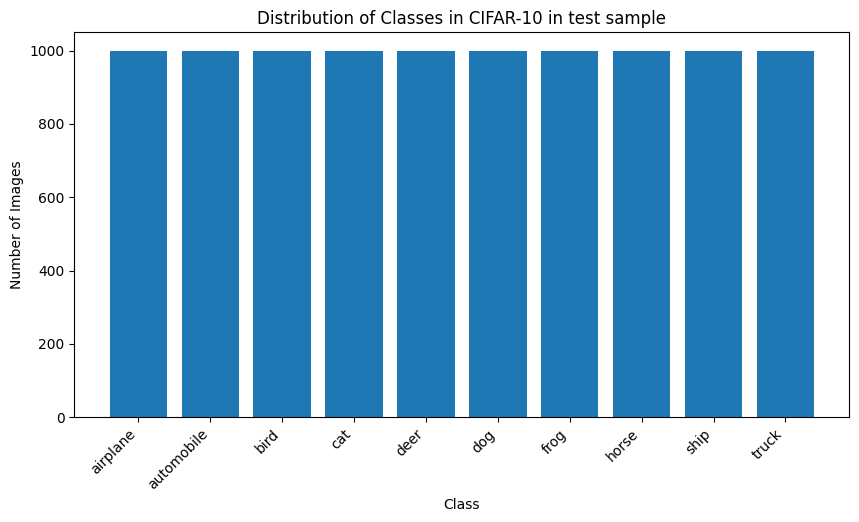

In [6]:
class_counts = np.bincount(y_test.flatten())

plt.figure(figsize=(10, 5))
plt.bar(range(len(class_counts)), class_counts, tick_label=labels)
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.title('Distribution of Classes in CIFAR-10 in test sample')
plt.xticks(rotation=45, ha='right')
plt.show()

### As we can see, this proofs that we have same number of observations in each class. 

In [7]:
print(x_test.shape)
print(y_test.shape)

print(x_train.shape)
print(y_train.shape)

(10000, 32, 32, 3)
(10000, 1)
(50000, 32, 32, 3)
(50000, 1)


In [8]:
np.any(np.isnan(x_train))

False

In [9]:
np.any(np.isnan(y_train))

False

In [10]:
np.any(np.isnan(x_test))

False

In [11]:
np.any(np.isnan(y_test))

False

### Our dataset has 0 missing values.

### Below we can see sample images in our dataset

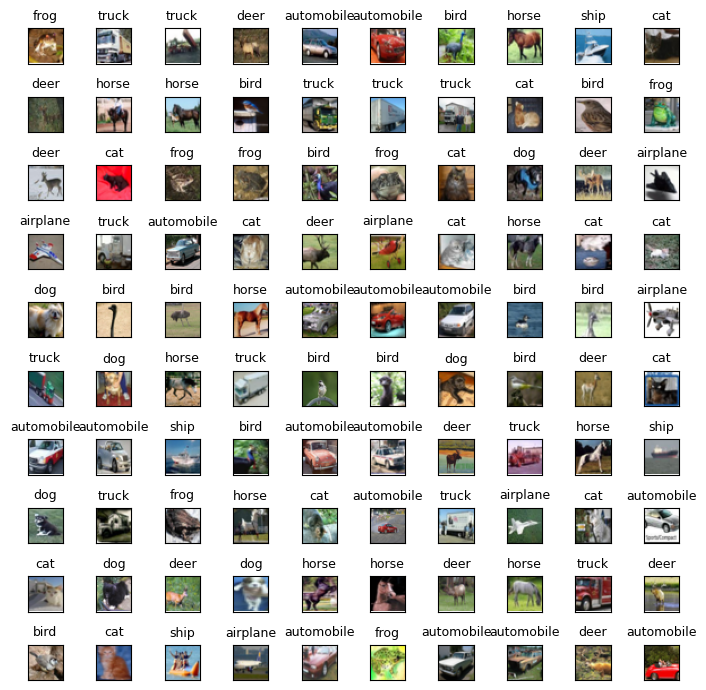

In [41]:
subplot_size = (0.5, 0.5)
fig, axes = plt.subplots(10, 10, figsize=(7, 7))

for i in range(10):
    for j in range(10):
        index = i * 10 + j
        
        axes[i, j].imshow(x_train[index])
        axes[i, j].set_xticks([])
        axes[i, j].set_yticks([])
        axes[i, j].set_title(labels[y_train[index][0]],fontsize=9)

plt.tight_layout()
plt.show()

## Preparing data - data augmentation

In [12]:
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10) # using onehot encoding
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

In [13]:
print(y_train.shape)
print(y_test.shape)

(50000, 10)
(10000, 10)


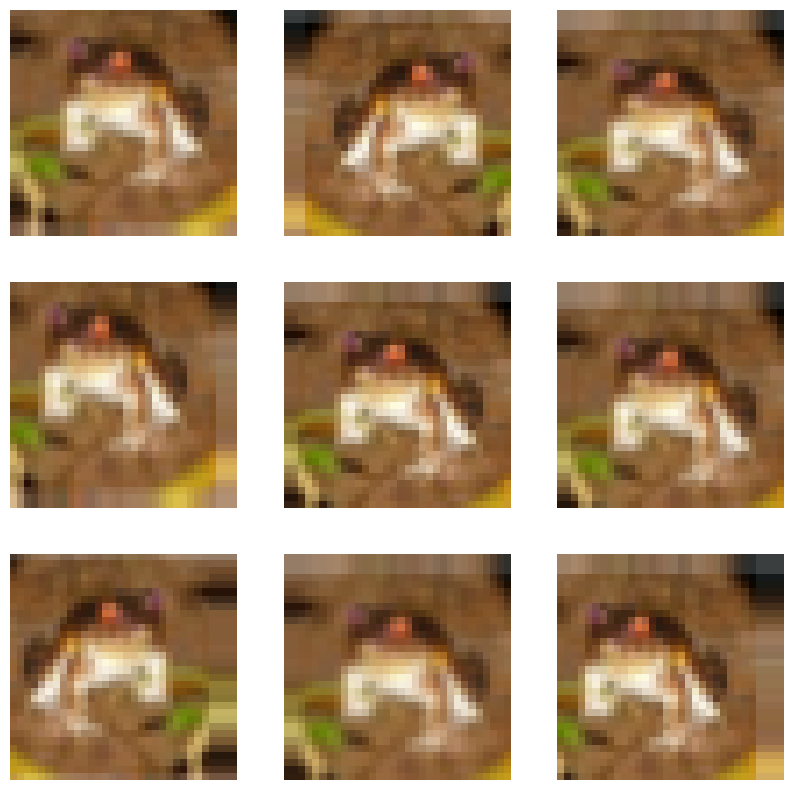

In [14]:
datagen = ImageDataGenerator(
    width_shift_range=0.1, height_shift_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

img = x_train[0]
img = img.reshape((1,) + img.shape)

plt.figure(figsize=(10, 10))
i = 0
for batch in datagen.flow(img, batch_size=1):
    plt.subplot(3, 3, i + 1)
    plt.imshow(batch[0].astype('uint8'))
    plt.axis('off')
    i += 1
    if i >= 9:
        break

plt.show()

## Above we see how image augmentation works, it does modifications such as rotation, width shift, height shift, shear, zoom, and horizontal flip.

In [15]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train, x_test = x_train / 255.0, x_test / 255.0

## Applying models

## First model 
### with steps_per_epoch parameter with which i had problem so i ran models without it and got better results

In [46]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax'))

Epoch 1/100


C:\Users\kacpe\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


781/781 ━━━━━━━━━━━━━━━━━━━━ 89s 111ms/step - accuracy: 0.2668 - loss: 2.0119 - val_accuracy: 0.4556 - val_loss: 1.4964
Epoch 2/100
  1/781 ━━━━━━━━━━━━━━━━━━━━ 1:05 84ms/step - accuracy: 0.4062 - loss: 1.6008

C:\Users\kacpe\AppData\Local\Programs\Python\Python311\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


781/781 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.4062 - loss: 0.8014 - val_accuracy: 0.4580 - val_loss: 1.5145
Epoch 3/100
781/781 ━━━━━━━━━━━━━━━━━━━━ 92s 118ms/step - accuracy: 0.4403 - loss: 1.5552 - val_accuracy: 0.5086 - val_loss: 1.3575
Epoch 4/100
781/781 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.5781 - loss: 0.5484 - val_accuracy: 0.5013 - val_loss: 1.3710
Epoch 5/100
781/781 ━━━━━━━━━━━━━━━━━━━━ 92s 117ms/step - accuracy: 0.4938 - loss: 1.4101 - val_accuracy: 0.5573 - val_loss: 1.2121
Epoch 6/100
781/781 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.4688 - loss: 0.6847 - val_accuracy: 0.5535 - val_loss: 1.2230
Epoch 7/100
781/781 ━━━━━━━━━━━━━━━━━━━━ 88s 112ms/step - accuracy: 0.5390 - loss: 1.2966 - val_accuracy: 0.5799 - val_loss: 1.1846
Epoch 8/100
781/781 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.5625 - loss: 0.5629 - val_accuracy: 0.5901 - val_loss: 1.1470
Epoch 9/100
781/781 ━━━━━━━━━━━━━━━━━━━━ 71s 90ms/step - accuracy: 0.5766 - loss: 1.1994 - val_accur

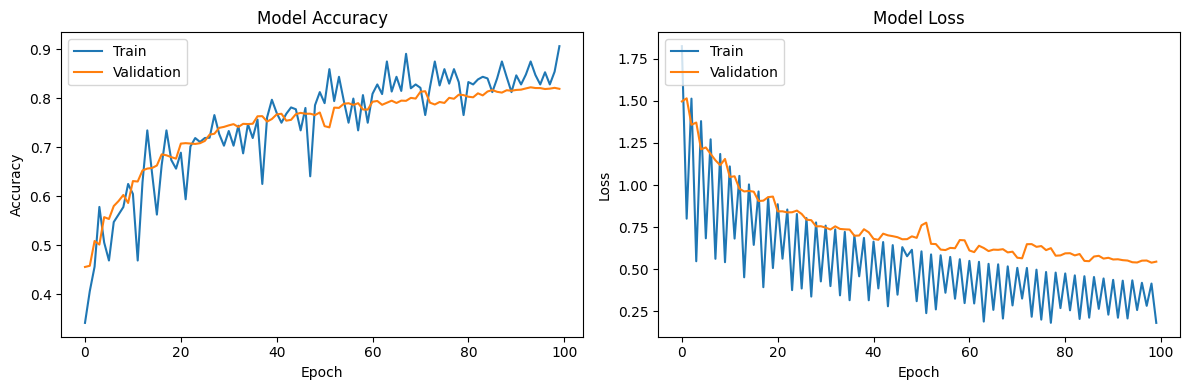

In [47]:
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9), loss='categorical_crossentropy', metrics=['accuracy'])
batch_size=64

steps = len(x_train)//batch_size

d_train = datagen.flow(x_train, y_train, batch_size)

history = model.fit(d_train,
                    epochs=100, 
                    steps_per_epoch=steps,
                    validation_data=(x_test, y_test))

y_pred = np.argmax(model.predict(x_test), axis=1)
accuracy = accuracy_score(np.argmax(y_test, axis=1), y_pred)
conf_matrix = confusion_matrix(np.argmax(y_test, axis=1), y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)


plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

### accuracy is ~0.82.

## Second model

In [50]:
model = Sequential()
model.add(Conv2D(32,(3, 3),activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(10, activation='softmax'))

C:\Users\kacpe\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/100


C:\Users\kacpe\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


781/781 ━━━━━━━━━━━━━━━━━━━━ 29s 35ms/step - accuracy: 0.1237 - loss: 2.2942 - val_accuracy: 0.1989 - val_loss: 2.1722
Epoch 2/100
  1/781 ━━━━━━━━━━━━━━━━━━━━ 13s 17ms/step - accuracy: 0.1719 - loss: 2.2049

C:\Users\kacpe\AppData\Local\Programs\Python\Python311\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


781/781 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.1719 - loss: 1.1039 - val_accuracy: 0.2005 - val_loss: 2.1719
Epoch 3/100
781/781 ━━━━━━━━━━━━━━━━━━━━ 26s 33ms/step - accuracy: 0.2051 - loss: 2.1178 - val_accuracy: 0.2864 - val_loss: 1.9453
Epoch 4/100
781/781 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.3281 - loss: 0.9549 - val_accuracy: 0.2870 - val_loss: 1.9454
Epoch 5/100
781/781 ━━━━━━━━━━━━━━━━━━━━ 26s 32ms/step - accuracy: 0.2584 - loss: 1.9716 - val_accuracy: 0.3417 - val_loss: 1.7819
Epoch 6/100
781/781 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.3594 - loss: 0.9023 - val_accuracy: 0.3406 - val_loss: 1.7851
Epoch 7/100
781/781 ━━━━━━━━━━━━━━━━━━━━ 26s 33ms/step - accuracy: 0.3208 - loss: 1.8270 - val_accuracy: 0.3994 - val_loss: 1.6685
Epoch 8/100
781/781 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2969 - loss: 0.9457 - val_accuracy: 0.3963 - val_loss: 1.6719
Epoch 9/100
781/781 ━━━━━━━━━━━━━━━━━━━━ 43s 55ms/step - accuracy: 0.3532 - loss: 1.7392 - val_accuracy

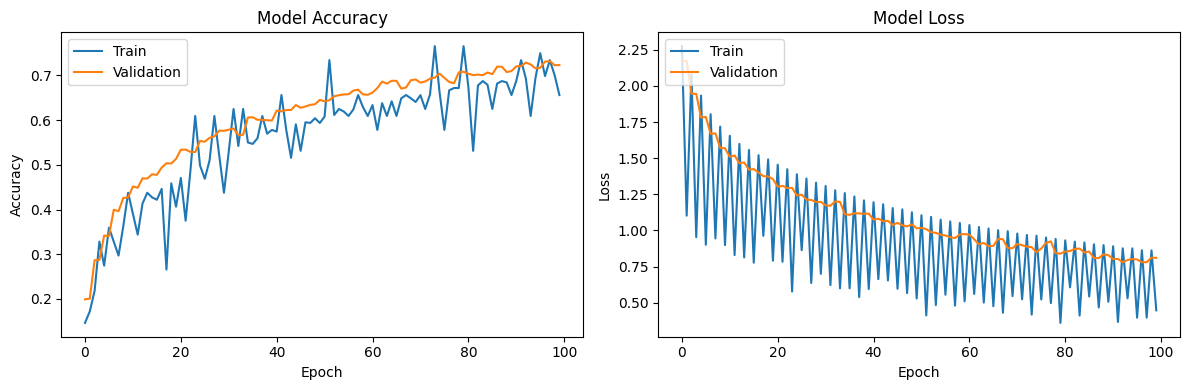

In [51]:
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9), loss='categorical_crossentropy', metrics=['accuracy'])
batch_size=64

steps = int(x_train.shape[0] / 64)

d_train = datagen.flow(x_train, y_train, batch_size)

history = model.fit(d_train,
                    epochs=100, 
                    steps_per_epoch=steps,
                    validation_data=(x_test, y_test))

y_pred = np.argmax(model.predict(x_test), axis=1)
accuracy = accuracy_score(np.argmax(y_test, axis=1), y_pred)
conf_matrix = confusion_matrix(np.argmax(y_test, axis=1), y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)


plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

### Here accuracy is lower and only 0.72.

## First model without steps_per_epoch parameter

In [53]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax'))

C:\Users\kacpe\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/100


C:\Users\kacpe\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


782/782 ━━━━━━━━━━━━━━━━━━━━ 89s 112ms/step - accuracy: 0.2846 - loss: 1.9694 - val_accuracy: 0.4668 - val_loss: 1.4837
Epoch 2/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 79s 100ms/step - accuracy: 0.4555 - loss: 1.5007 - val_accuracy: 0.5343 - val_loss: 1.2922
Epoch 3/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 77s 98ms/step - accuracy: 0.5114 - loss: 1.3579 - val_accuracy: 0.5810 - val_loss: 1.1685
Epoch 4/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 85s 108ms/step - accuracy: 0.5620 - loss: 1.2468 - val_accuracy: 0.5937 - val_loss: 1.1296
Epoch 5/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 86s 109ms/step - accuracy: 0.5910 - loss: 1.1576 - val_accuracy: 0.6457 - val_loss: 1.0075
Epoch 6/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 88s 112ms/step - accuracy: 0.6182 - loss: 1.0785 - val_accuracy: 0.6298 - val_loss: 1.0384
Epoch 7/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 91s 116ms/step - accuracy: 0.6418 - loss: 1.0232 - val_accuracy: 0.6715 - val_loss: 0.9326
Epoch 8/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 89s 114ms/step - accuracy: 0.6526 - loss: 0.9848

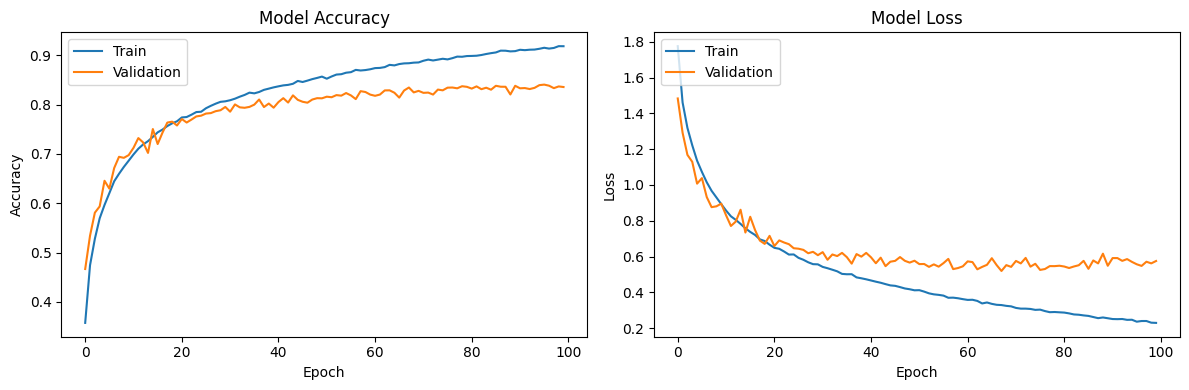

In [54]:
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9), loss='categorical_crossentropy', metrics=['accuracy'])
batch_size=64

steps = len(x_train)//batch_size

d_train = datagen.flow(x_train, y_train, batch_size)

history = model.fit(d_train,
                    epochs=100,
                    validation_data=(x_test, y_test))

y_pred = np.argmax(model.predict(x_test), axis=1)
accuracy = accuracy_score(np.argmax(y_test, axis=1), y_pred)
conf_matrix = confusion_matrix(np.argmax(y_test, axis=1), y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)


plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

### Here accuracy is around 0.84

## Second model without step_per_epoch parameter

In [56]:
model = Sequential()
model.add(Conv2D(32,(3, 3),activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(10, activation='softmax'))

C:\Users\kacpe\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/100


C:\Users\kacpe\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


782/782 ━━━━━━━━━━━━━━━━━━━━ 27s 33ms/step - accuracy: 0.1184 - loss: 2.2934 - val_accuracy: 0.2528 - val_loss: 2.1588
Epoch 2/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 26s 33ms/step - accuracy: 0.2211 - loss: 2.1075 - val_accuracy: 0.2737 - val_loss: 1.9572
Epoch 3/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 26s 33ms/step - accuracy: 0.2652 - loss: 1.9647 - val_accuracy: 0.3477 - val_loss: 1.7719
Epoch 4/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 26s 32ms/step - accuracy: 0.3154 - loss: 1.8263 - val_accuracy: 0.3938 - val_loss: 1.6512
Epoch 5/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 26s 32ms/step - accuracy: 0.3556 - loss: 1.7314 - val_accuracy: 0.4282 - val_loss: 1.5737
Epoch 6/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 26s 32ms/step - accuracy: 0.3910 - loss: 1.6553 - val_accuracy: 0.4514 - val_loss: 1.5094
Epoch 7/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 26s 32ms/step - accuracy: 0.4093 - loss: 1.6018 - val_accuracy: 0.4687 - val_loss: 1.4501
Epoch 8/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 26s 32ms/step - accuracy: 0.4267 - loss: 1.5606 - val_

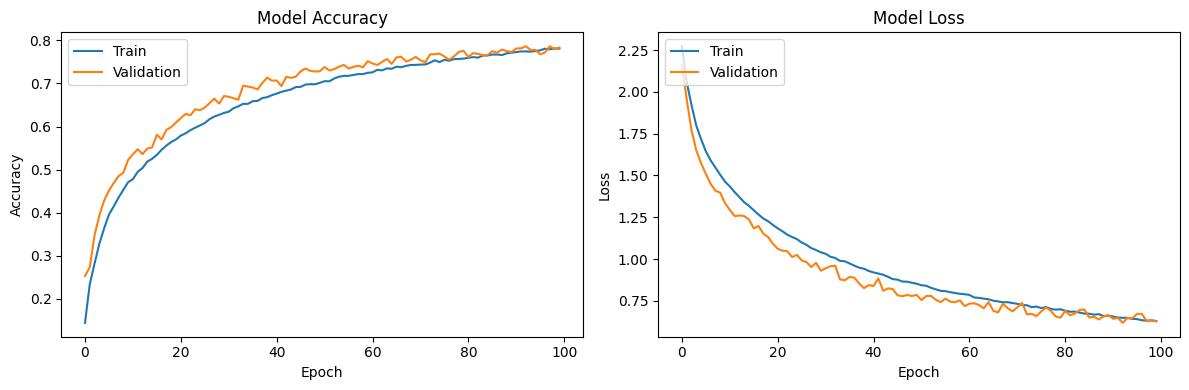

In [57]:
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9), loss='categorical_crossentropy', metrics=['accuracy'])
batch_size=64

steps = int(x_train.shape[0] / 64)

d_train = datagen.flow(x_train, y_train, batch_size)

history = model.fit(d_train,
                    epochs=100,
                    validation_data=(x_test, y_test))

y_pred = np.argmax(model.predict(x_test), axis=1)
accuracy = accuracy_score(np.argmax(y_test, axis=1), y_pred)
conf_matrix = confusion_matrix(np.argmax(y_test, axis=1), y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)


plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

### Accuracy = 0.78

### Below is model that returned best score (0.84) with 3 additional dropout layers:

In [16]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Dropout(0.3))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Dropout(0.3))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu', kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

C:\Users\kacpe\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/100


C:\Users\kacpe\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


782/782 ━━━━━━━━━━━━━━━━━━━━ 93s 115ms/step - accuracy: 0.1711 - loss: 2.2359 - val_accuracy: 0.3363 - val_loss: 1.8646
Epoch 2/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 95s 122ms/step - accuracy: 0.3205 - loss: 1.8572 - val_accuracy: 0.4185 - val_loss: 1.6270
Epoch 3/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 97s 123ms/step - accuracy: 0.3763 - loss: 1.6958 - val_accuracy: 0.4610 - val_loss: 1.5308
Epoch 4/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 96s 122ms/step - accuracy: 0.4090 - loss: 1.5982 - val_accuracy: 0.4771 - val_loss: 1.4404
Epoch 5/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 86s 110ms/step - accuracy: 0.4372 - loss: 1.5332 - val_accuracy: 0.5023 - val_loss: 1.3595
Epoch 6/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 96s 123ms/step - accuracy: 0.4589 - loss: 1.4768 - val_accuracy: 0.5183 - val_loss: 1.3200
Epoch 7/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 102s 130ms/step - accuracy: 0.4725 - loss: 1.4347 - val_accuracy: 0.5343 - val_loss: 1.2891
Epoch 8/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 92s 118ms/step - accuracy: 0.4941 - loss: 1.39

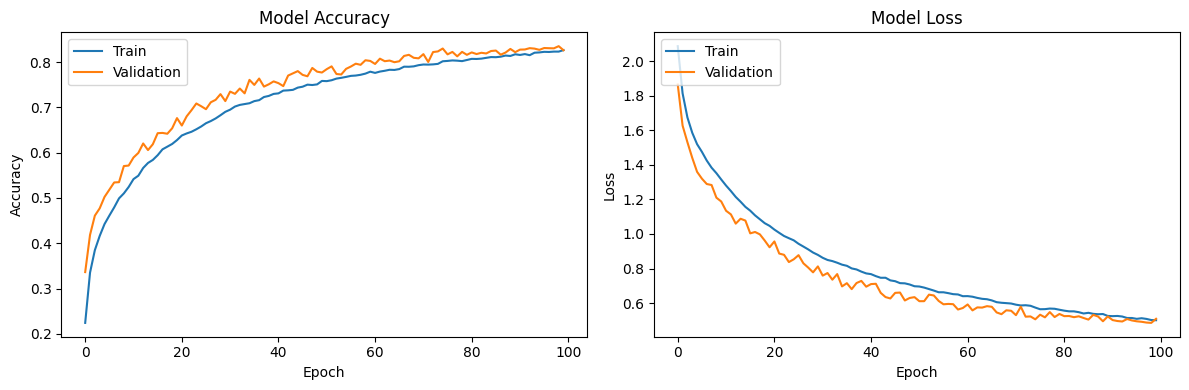

In [17]:
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9), loss='categorical_crossentropy', metrics=['accuracy'])
batch_size=64

steps = len(x_train)//batch_size

d_train = datagen.flow(x_train, y_train, batch_size)

history = model.fit(d_train,
                    epochs=100,
                    validation_data=(x_test, y_test))

y_pred = np.argmax(model.predict(x_test), axis=1)
accuracy = accuracy_score(np.argmax(y_test, axis=1), y_pred)
conf_matrix = confusion_matrix(np.argmax(y_test, axis=1), y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)


plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

### Accuracy = ~0.83

## Conclusion
### After testing some configurations, the best accuracy score I got was with first model without steps_per_epoch parameter. Due to the very long simulations i got to test only a few configurations and decided to present two models one with simple and one with more complex configuration that were returning best accuracies. 